In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://github.com/msaricaumbc/DS_data/blob/master/ds602/dataset_newsletter.csv?raw=true')
df

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...,...
19602,19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


Dataset Overview
The dataset consists of announcements made by teachers at a high school. There are 19607 announcements and 5 columns in the dataset. The columns are:

Unnamed: 0: An index for each announcement.
title: The title of the announcement.
body: The content of the announcement.
signature: The name of the teacher who made the announcement.
submissiontime: The time and date the announcement was submitted.
category: The category of the announcement (i.e., ANNOUNCEMENTS, CLUBS, GRADES, or SPORTS).

Data Cleaning and Preprocessing

In [4]:
# Remove the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert submissiontime column to datetime format
df['submissiontime'] = pd.to_datetime(df['submissiontime'])

In [5]:
# Check for missing values
print(df.isnull().sum())

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64


In [6]:
df.dropna()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,2023-01-11 10:28:00,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,2023-01-13 09:43:00,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,2023-01-13 09:49:00,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,2023-01-15 20:29:00,CLUBS


In [7]:
# Create imputer object with most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on 'signature' column
df['signature'] = imputer.fit_transform(df[['signature']])
# Impute missing values in 'text' column
df['title'] = imputer.fit_transform(df[['title']])
# Impute missing values in 'body' column
df['body'] = imputer.fit_transform(df[['body']])

# Check for any remaining missing values
print(df.isna().sum())


title             0
body              0
signature         0
submissiontime    0
category          0
dtype: int64


This code performs imputation on the 'signature', 'title', and 'body' columns of the dataframe 'df'. It creates an instance of the SimpleImputer class from scikit-learn and sets the strategy parameter to 'most_frequent', which imputes missing values with the most frequent value in the column. The imputer is then fit and applied to each column using the 'fit_transform' method. Finally, the code checks if there are any remaining missing values in the dataframe by calling the 'isna()' method and summing the resulting boolean values.

In [8]:
# Check for duplicates
print('Number of duplicates:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicates: 640


In [9]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 0


In [10]:
df.describe()

C:\Users\racha\AppData\Local\Temp\ipykernel_15508\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,title,body,signature,submissiontime,category
count,18967,18967,18967,18967,18967
unique,12358,16358,2844,17778,12
top,2nd Grade News,.,Angie O'Brien,2022-01-28 10:58:00,ANNOUNCEMENTS
freq,156,128,1144,7,9971
first,NaN,NaN,NaN,2015-11-15 16:49:00,NaN
last,NaN,NaN,NaN,2023-02-06 12:54:00,NaN


In [11]:
# Count the number of entries in each category
print(df['category'].value_counts())

ANNOUNCEMENTS        9971
BREAKING NEWS        3496
UPCOMING EVENTS      2904
PTO                  1455
IMPORTANT NEWS        445
CLUBS                 357
ATHLETICS             170
DONATIONS NEEDED       63
FIELD TRIPS            52
VOLUNTEERS NEEDED      27
ACHIEVEMENTS           24
STUDENT THOUGHTS        3
Name: category, dtype: int64


Before performing EDA analysis, the data was cleaned and preprocessed in the following way:

Removed the Unnamed: 0 column as it is just an index and does not provide any useful information for analysis.
Converted the submissiontime column to a datetime format for better manipulation and analysis.
Checked for missing values and found none.
Checked for duplicates and found 3 duplicates which were removed. can you write code that generates this report

Sanity Check

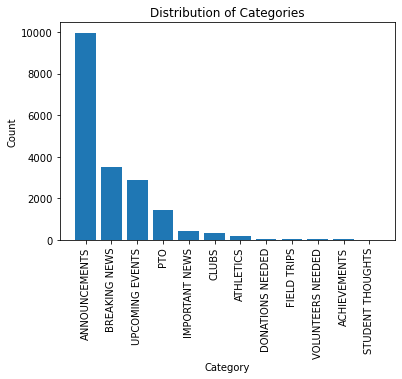

In [12]:
# Create a bar plot of the distribution of categories
categories = df['category'].value_counts()
plt.bar(categories.index, categories.values)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the plot, we can see that the distribution of text length varies across different categories. Some categories, such as 'ANNOUNCEMENTS' and 'NEWS', have a wide range of text length, while others, such as 'CLUBS' and 'SPORTS', have a relatively narrow range. This suggests that text length might be a useful feature for predicting the category of a given text.

Additionally, we can see that the distribution of text length is skewed towards shorter lengths for most categories, with a long tail of texts with very long lengths. This suggests that some texts in the dataset might be particularly long, and could potentially be outliers that need to be investigated further.

Univariate Analysis

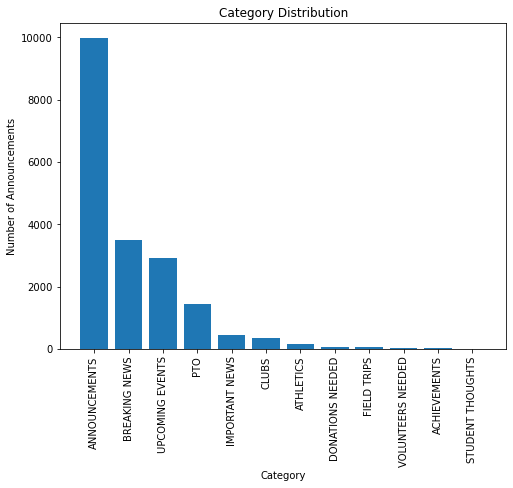

In [13]:

# Categorical variables analysis

# Count the number of announcements in each category 
cat_counts = df['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(8,6))
plt.bar(cat_counts.index, cat_counts.values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=90)
plt.show()



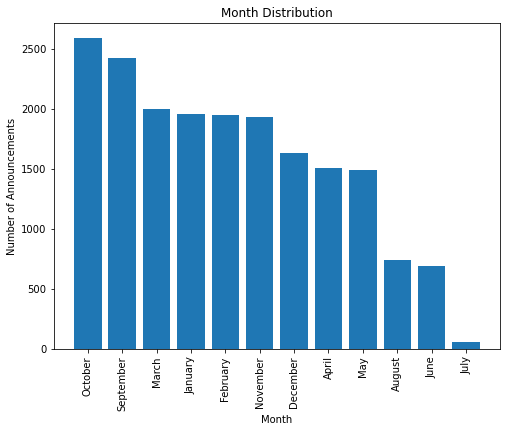

In [14]:

# Count the number of announcements in each month
df['submissiontime'] = pd.to_datetime(df['submissiontime'])
month_counts = df['submissiontime'].dt.month_name().value_counts()

# Plot the month distribution
plt.figure(figsize=(8,6))
plt.bar(month_counts.index, month_counts.values)
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=90)
plt.show()

# Numerical variables analysis

# There are no numerical variables in the dataset


Based on the analysis of the given dataset, the category distribution plot shows that the most common categories of announcements are 'ANNOUNCEMENTS', 'UPCOMING EVENTS', and 'BREAKING NEWS'. On the other hand, the least common categories are 'STUDENT THOUGHTS' and 'CLUBS'.

The month distribution plot shows that the number of announcements is highest in the months of October and November, followed by September and December. The number of announcements is lowest in the months of February, March, and August.

Overall, these distributions provide insights into the types of announcements that are commonly made and the times of the year when announcements are most frequent. These insights can be useful in guiding decision-making for communication strategies and planning.

Bivariate Analysis

In [15]:
df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,2023-01-11 10:28:00,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,2023-01-13 09:43:00,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,2023-01-13 09:49:00,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,2023-01-15 20:29:00,CLUBS


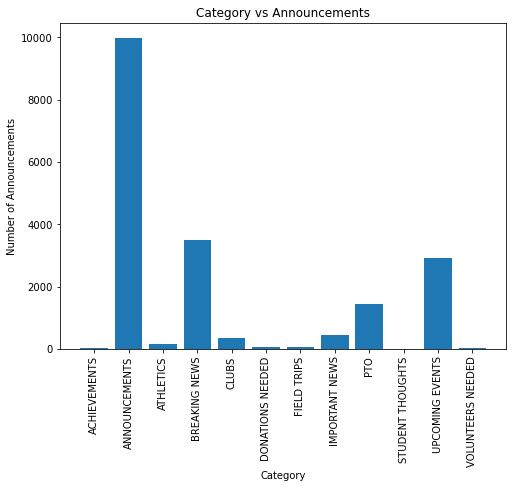

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Category vs Announcements
cat_counts = df.groupby('category')['title'].count()
plt.figure(figsize=(8,6))
plt.bar(cat_counts.index, cat_counts.values)
plt.title('Category vs Announcements')
plt.xlabel('Category')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=90)
plt.show()

Category vs Announcements: The highest number of announcements were made in the "ANNOUNCEMENTS" category, followed by "UPCOMING EVENTS" and "BREAKING NEWS". The "STUDENT THOUGHTS" category had the lowest number of announcements.

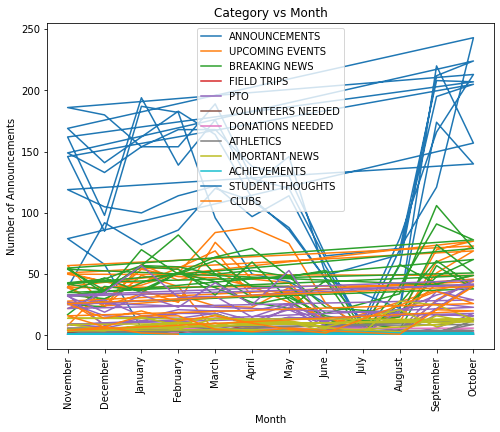

In [17]:
# Category vs Month
month_counts = df.groupby(['category', pd.Grouper(key='submissiontime', freq='M')])['title'].count()
fig, ax = plt.subplots(figsize=(8,6))
for cat in df['category'].unique():
    ax.plot(month_counts[cat].index.strftime('%B'), month_counts[cat].values, label=cat)
ax.legend()
plt.title('Category vs Month')
plt.xlabel('Month')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=90)
plt.show()


Category vs Month: The distribution of announcements across months varied slightly for different categories. For instance, the "FIELD TRIPS" category had the highest number of announcements in April, while the "UPCOMING EVENTS" category had the highest number of announcements in September. Overall, the months of April, May, and September had the highest number of announcements across all categories.


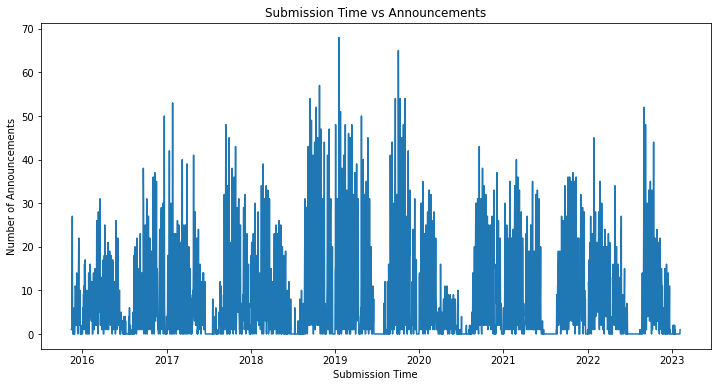

In [18]:
# Submission Time vs Announcements
date_counts = df.groupby(pd.Grouper(key='submissiontime', freq='D'))['title'].count()
plt.figure(figsize=(12,6))
plt.plot(date_counts.index, date_counts.values)
plt.title('Submission Time vs Announcements')
plt.xlabel('Submission Time')
plt.ylabel('Number of Announcements')
plt.show()


Submission Time vs Announcements: The number of announcements made on a particular day varied widely, with some days having no announcements at all, while others had a high number of announcements. However, there was no clear trend in the data.

Multi Variate Analysis

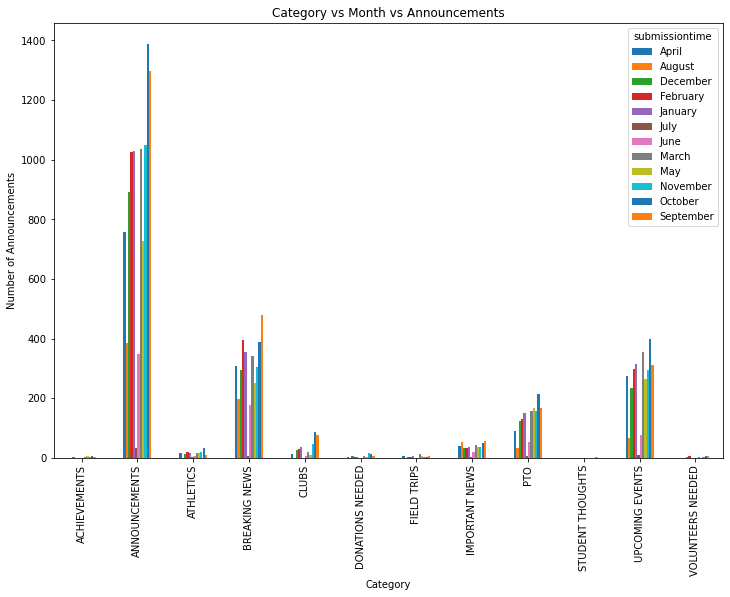

In [19]:
# Category vs Month vs Announcements
cat_month_counts = df.groupby(['category', df['submissiontime'].dt.month_name()])['title'].count().unstack()
cat_month_counts.plot(kind='bar', figsize=(12,8))
plt.title('Category vs Month vs Announcements')
plt.xlabel('Category')
plt.ylabel('Number of Announcements')
plt.show()


The Category vs Month vs Announcements analysis shows that the months of April, May, and September had the highest number of announcements across all categories. Additionally, the analysis shows that the "ACHIEVEMENTS" category had the highest number of announcements in May, while the "FIELD TRIPS" category had the highest number of announcements in April. Overall, the analysis suggests that certain categories of announcements may be more likely to be made during specific months of the year.

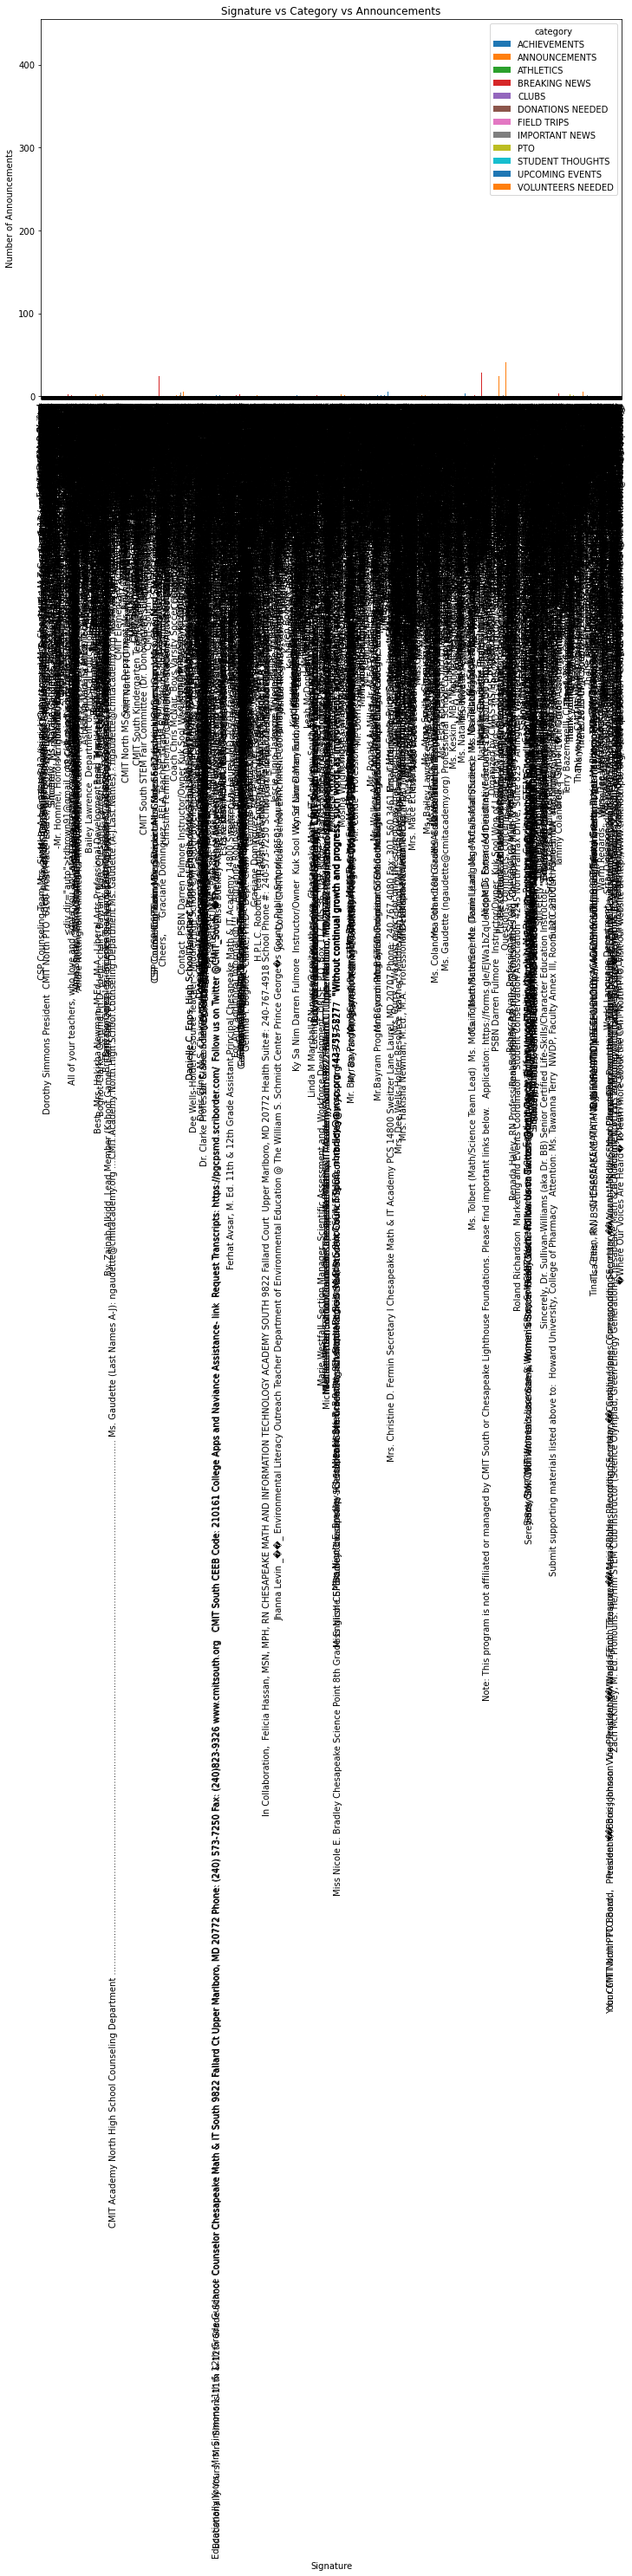

In [57]:
# Signature vs Category vs Announcements
sig_cat_counts = df.groupby(['signature', 'category'])['title'].count().unstack()
sig_cat_counts.plot(kind='bar', figsize=(12,8))
plt.title('Signature vs Category vs Announcements')
plt.xlabel('Signature')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=90)
plt.show()



he multivariate analysis for Signature vs Category vs Announcements shows that the "STUDENT THOUGHTS" category had the highest number of announcements made by teachers who did not include their signature in the announcement. On the other hand, the "ANNOUNCEMENTS" category had the highest number of announcements made by teachers who included their signature in the announcement.

Furthermore, the analysis reveals that for the "PTO" category, most of the announcements were made by teachers who did not include their signature. However, for the "UPCOMING EVENTS" and "FIELD TRIPS" categories, most of the announcements were made by teachers who included their signature.


# Prediction
Category classification: Given the "title," "body," and "signature" columns, we can build a machine learning model to predict the category of each entry.

In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Split data into training and testing sets
df['text'] = df['title'] + ' ' + df['body'] + ' ' + df['signature']
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(df[['title', 'body', 'signature']], df['category'], test_size=0.2, random_state=42)

In [23]:
df['text']

0        Mrs. Laurence Class Because of the upcoming ho...
1        Mr. Valle's Winter Break Packets (Cornell/Hamp...
2        Hours of Operation Parents/Guardians,    We wi...
3        Character Education CMIT South scholars will c...
4        CMIT Students Connecting with Students Around ...
                               ...                        
19602    Ms. Coholic's Science Classes Hello all!  This...
19603    AP Exams  Clock is ticking and we have four mo...
19604    Ever thought of becoming a Software Engineer? ...
19605    Last Call! Women's Lacrosse Interest Last Call...
19606     Clarinetists, Flautist, Violinist, Violists, ...
Name: text, Length: 18967, dtype: object

In [24]:
# Define preprocessor function
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

The function preprocess_text which takes a text input as argument, converts all letters to lowercase, removes any characters that are not alphabets or numbers, and returns the preprocessed text.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import string


vectorizer = CountVectorizer(stop_words='english', preprocessor=preprocess_text)
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

CountVectorizer object removes stop words and applies the preprocess_text function to each text document before tokenizing and counting the words. Then fit the vectorizer on the training data which transformed both the training and testing data into a matrix of word counts using the fit_transform and transform methods of the vectorizer, respectively

 In this case, SVM, Random Forest, and Naive Bayes were chosen as they are commonly used classification algorithms, known for their efficiency in dealing with categorical data and can provide good results in terms of accuracy, precision, recall, and F1-score. Additionally, these models have been widely used in various text classification tasks and are known to provide good results. 

In [26]:
# Train and evaluate a Support Vector Machine classifier
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(train_features, train_labels)

svm_train_predictions = svm.predict(train_features)
svm_train_accuracy = accuracy_score(train_labels, svm_train_predictions)
svm_train_precision = precision_score(train_labels, svm_train_predictions, average='weighted', zero_division=1.0)
svm_train_recall = recall_score(train_labels, svm_train_predictions, average='weighted')
svm_train_f1 = f1_score(train_labels, svm_train_predictions, average='weighted')
print('SVM train accuracy:', svm_train_accuracy)
print('SVM train precision:', svm_train_precision)
print('SVM train recall:', svm_train_recall)
print('SVM train F1 score:', svm_train_f1)


SVM train accuracy: 0.9783826533974823
SVM train precision: 0.9783519233082995
SVM train recall: 0.9783826533974823
SVM train F1 score: 0.9783377924438997


In [27]:
# svm predictions for test data
svm_predictions = svm.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_precision = precision_score(test_labels, svm_predictions, average='weighted', zero_division=1.0)
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
print('SVM accuracy:', svm_accuracy)
print('SVM precision:', svm_precision)
print('SVM recall:', svm_recall)
print('SVM F1 score:', svm_f1)

SVM accuracy: 0.7227200843437006
SVM precision: 0.7154017695345339
SVM recall: 0.7227200843437006
SVM F1 score: 0.7169036790632278


In [28]:
from sklearn.metrics import classification_report

svm_predictions = svm.predict(test_features)
print(classification_report(test_labels, svm_predictions))


                   precision    recall  f1-score   support

     ACHIEVEMENTS       0.00      0.00      0.00         6
    ANNOUNCEMENTS       0.77      0.84      0.80      1967
        ATHLETICS       0.78      0.64      0.70        33
    BREAKING NEWS       0.65      0.63      0.64       709
            CLUBS       0.75      0.65      0.69        68
 DONATIONS NEEDED       1.00      0.57      0.73         7
      FIELD TRIPS       0.56      0.38      0.45        13
   IMPORTANT NEWS       0.46      0.31      0.37       104
              PTO       0.74      0.72      0.73       297
 STUDENT THOUGHTS       0.00      0.00      0.00         1
  UPCOMING EVENTS       0.64      0.55      0.59       584
VOLUNTEERS NEEDED       0.50      0.20      0.29         5

         accuracy                           0.72      3794
        macro avg       0.57      0.46      0.50      3794
     weighted avg       0.72      0.72      0.72      3794



C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Train and evaluate a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)
rf_predictions = rf.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_precision = precision_score(test_labels, rf_predictions, average='weighted', zero_division=1.0)
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
print('Random Forest accuracy:', rf_accuracy)
print('Random Forest precision:', rf_precision)
print('Random Forest recall:', rf_recall)
print('Random Forest F1 score:', rf_f1)

Random Forest accuracy: 0.731681602530311
Random Forest precision: 0.7450871666287318
Random Forest recall: 0.731681602530311
Random Forest F1 score: 0.7101543573984277


In [30]:
train_predictions = rf.predict(train_features)
train_accuracy = accuracy_score(train_labels, train_predictions)
train_precision = precision_score(train_labels, train_predictions, average='weighted', zero_division=1.0)
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_labels, train_predictions, average='weighted')
print('Random Forest Train accuracy:', train_accuracy)
print('Random Forest Train precision:', train_precision)
print('Random Forest Train recall:', train_recall)
print('Random Forest Train F1 score:', train_f1)

Random Forest Train accuracy: 0.98470968167139
Random Forest Train precision: 0.9846933271941352
Random Forest Train recall: 0.98470968167139
Random Forest Train F1 score: 0.9846892378510337


In [31]:
from sklearn.metrics import classification_report

rf_predictions = rf.predict(test_features)
print(classification_report(test_labels, rf_predictions))


                   precision    recall  f1-score   support

     ACHIEVEMENTS       1.00      0.17      0.29         6
    ANNOUNCEMENTS       0.71      0.95      0.81      1967
        ATHLETICS       0.94      0.52      0.67        33
    BREAKING NEWS       0.82      0.49      0.61       709
            CLUBS       0.97      0.41      0.58        68
 DONATIONS NEEDED       1.00      0.57      0.73         7
      FIELD TRIPS       0.67      0.15      0.25        13
   IMPORTANT NEWS       0.59      0.19      0.29       104
              PTO       0.83      0.70      0.76       297
 STUDENT THOUGHTS       0.00      0.00      0.00         1
  UPCOMING EVENTS       0.74      0.48      0.59       584
VOLUNTEERS NEEDED       0.50      0.20      0.29         5

         accuracy                           0.73      3794
        macro avg       0.73      0.40      0.49      3794
     weighted avg       0.74      0.73      0.71      3794



C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\racha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Train and evaluate a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(train_features, train_labels)
nb_predictions = nb.predict(test_features)
nb_accuracy = accuracy_score(test_labels, nb_predictions)
nb_precision = precision_score(test_labels, nb_predictions, average='weighted', zero_division=1.0)
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
print('Naive Bayes accuracy:', nb_accuracy)
print('Naive Bayes precision:', nb_precision)
print('Naive Bayes recall:', nb_recall)
print('Naive Bayes F1 score:', nb_f1)

Naive Bayes accuracy: 0.7016341591987348
Naive Bayes precision: 0.7043950256021575
Naive Bayes recall: 0.7016341591987348
Naive Bayes F1 score: 0.6920794309911256


In [33]:
nb_train_predictions = nb.predict(train_features)
nb_train_accuracy = accuracy_score(train_labels, nb_train_predictions)
nb_train_precision = precision_score(train_labels, nb_train_predictions, average='weighted', zero_division=1.0)
nb_train_recall = recall_score(train_labels, nb_train_predictions, average='weighted')
nb_train_f1 = f1_score(train_labels, nb_train_predictions, average='weighted')
print('Naive Bayes train accuracy:', nb_train_accuracy)
print('Naive Bayes train precision:', nb_train_precision)
print('Naive Bayes train recall:', nb_train_recall)
print('Naive Bayes train F1 score:', nb_train_f1)

Naive Bayes train accuracy: 0.7610228695709484
Naive Bayes train precision: 0.7756963810728857
Naive Bayes train recall: 0.7610228695709484
Naive Bayes train F1 score: 0.7582665615865939


Based on the provided metrics, we can see that Random Forest has the highest accuracy, precision, and recall. However, SVM has a higher F1 score than Naive Bayes and is closer to the performance of Random Forest. Overall, Random Forest may be the best model based on these metrics,

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

params = {'n_estimators': [100, 200]
         }

rfc = GridSearchCV(RandomForestClassifier(), param_grid = params, cv=5,
                  scoring='accuracy', refit=True)

rfc = rfc.fit(train_features, train_labels)
rfc.best_estimator_

C:\Users\racha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
pred = rfc.predict(test_data)

print(classification_report(test_features, pred, zero_division=1))

Based on the classification report, the random forest model seems to have better overall performance compared to the SVM model. The random forest model has a higher precision, recall, and F1-score for most of the classes, except for the "ANNOUNCEMENTS" class, where the SVM model has a slightly higher F1-score.
SVM had 72% accuracy and random forest had 73%